# Forecast for LiteBIRD 
This is done using a Hamimeche&Lewis likelihood and COBAYA. The maximum multipole is fixed at $\ell_{max} =300$.
We sampled the relevant reionisation parameters and As, while we fixed the other $\Lambda$CDM parameters to their fiducial value.

In [1]:
import MCtools
from getdist import plots, MCSamples
import reio
import warnings
warnings.filterwarnings("ignore")
DBdir = "/sps/planck/Users/tristram/Soft/LiteBIRD/Reio/chains"
MCtools.parname["reionization_width"] = "$\Delta z$"

## Table Of Content
* [Models](#Models)
* [Sky fraction](#Sky-fraction)
* [TANH](#TANH)
  * [Reionization optical depth](#Reionization-optical-depth)
  * [Reionization redshift](#Reionization-redshift)
  * [Reionization redshift + width](#Reionization-redshift-+-width)
* [Redshifts](#Redshifts)
  * [2pars, 3knots](#2pars,-3knots)
  * [3pars, 3knots](#3pars,-3knots)
* [Ionization fraction](#Ionization-fraction)
  * [4pars, 5knots](#4pars,-5knots)
* [Flexknots](#Flexknots)
  * [2pars, 1knot](#2pars,-1knot)
  * [4pars, 2knots](#4pars,-2knots)
  * [4pars, 3knots](#4pars,-3knots)

# Models

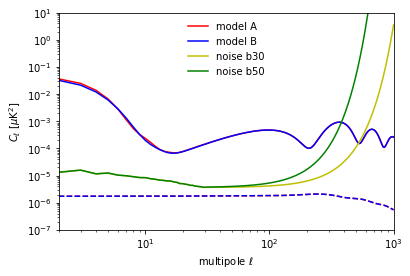

In [2]:
#noise
DATAdir = "/sps/planck/Users/tristram/Soft/LiteBIRD/Reio/modules/data/litebird"
modelA = np.loadtxt(f"{DATAdir}/model_A_cl_lensed.dat").T
modelB = np.loadtxt(f"{DATAdir}/model_B_cl_lensed.dat").T
noise30 = np.loadtxt( f"{DATAdir}/noise_litebird_only_b30.dat").T
noise50 = np.loadtxt( f"{DATAdir}/noise_litebird_only_b50.dat").T
c2d = modelA[0]*(modelA[0]+1)/2/pi
figure()
plot( modelA[0], modelA[2]*(2.725e6)**2/c2d, 'r', label="model A")
plot( modelB[0], modelB[2]*(2.725e6)**2/c2d, 'b', label="model B")
plot( modelA[0], modelA[4]*(2.725e6)**2/c2d, 'r--')
plot( modelB[0], modelB[4]*(2.725e6)**2/c2d, 'b--')
plot( noise30[0], noise30[2], 'y', label="noise b30")
plot( noise50[0], noise50[2], 'g', label="noise b50")
xlim(2,1000)
ylim(1e-7,1e1)
loglog()
ylabel( "$C_\ell$ [$\mu$K$^2$]")
xlabel( "multipole $\ell$")
legend()

# Sky fraction

lb_reio_A_b30_f55: 1521  2001  2001  881 
lb_reio_A_b30_f65: 1681  1761  1521  1681 
lb_reio_A_b30_f75: 3921  3361  3361  1761 
lb_reio_A_b30_f85: 2161  1441  1921  3521 
lb_reio_A_b30_f95: 2241  2881  1921  1761 
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

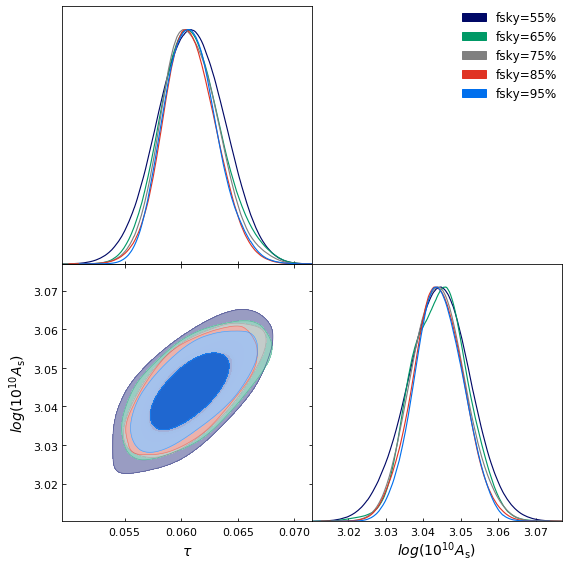

In [3]:
fsky = [55,65,75,85,95]
runnames = [f"lb_reio_A_b30_f{f}" for f in fsky]
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
listpar = ['tau','logA']
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = [f"fsky={f}%" for f in fsky],legend_loc = 'upper right')

In [4]:
for i,chain in enumerate(chains): 
    print( "fsky={}, tau={:.5f} +/- {:.5f}" .format(fsky[i], *MCtools.MaxPosterior(chain, 'tau', symmetrical=True)))

fsky=55, tau=0.06088 +/- 0.00294
fsky=65, tau=0.06075 +/- 0.00261
fsky=75, tau=0.06072 +/- 0.00245
fsky=85, tau=0.06065 +/- 0.00231
fsky=95, tau=0.06076 +/- 0.00225


# TANH

### Reionization optical depth

lb_reio_A_b30_f65: 1681  1761  1521  1681 
lb_reio_B_b30_f65: 1601  2961  3201  1281 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

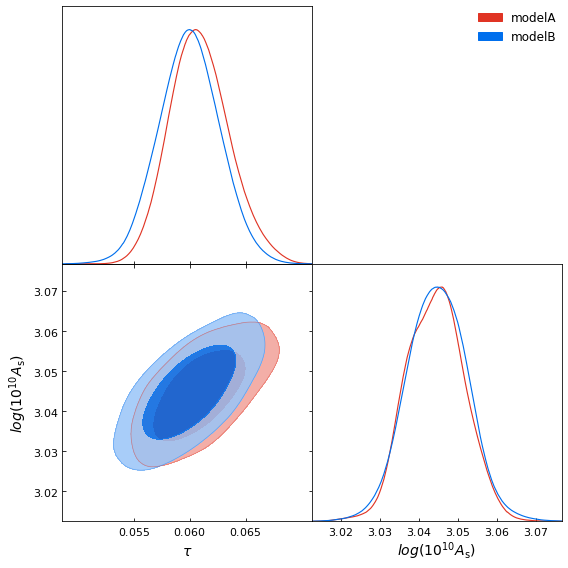

In [5]:
runnames = ["lb_reio_A_b30_f65","lb_reio_B_b30_f65"]
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
listpar = ['tau','logA']
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [6]:
MCtools.PrintMax( chains, 'tau')

tau             =  0.060745 +/- 0.002611  |   0.059983 +/- 0.002720


### Reionization redshift

lb_zreio_A_b30_f65: 1521  2081  2641  1761 
lb_zreio_B_b30_f65: 2001  1681  1681  2881 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

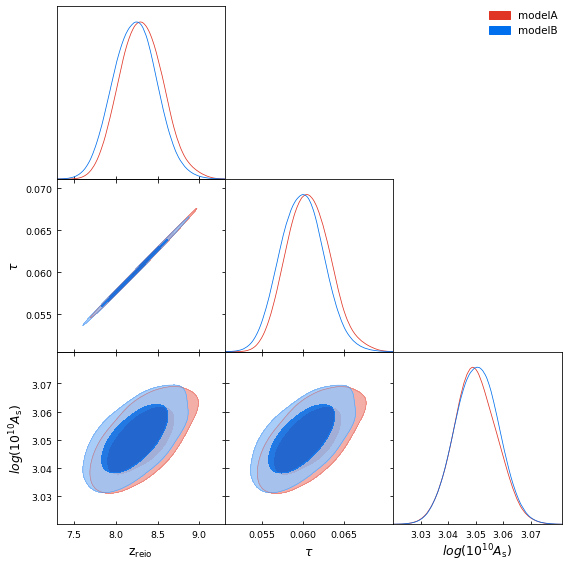

In [7]:
runnames = ["lb_zreio_A_b30_f65","lb_zreio_B_b30_f65"]
listpar = ['z_reio','tau','logA']
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [8]:
for par in ['tau','z_reio']: MCtools.PrintMax( chains, par)

tau             =  0.060650 +/- 0.002690  |   0.059941 +/- 0.002624
z_reio          =  8.304133 +/- 0.264494  |   8.234275 +/- 0.259125


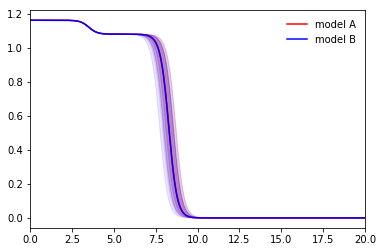

In [9]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], percentile( xe['xe'], 2.5, axis=0), percentile( xe['xe'], 97.5, axis=0), color=cols[ic], alpha=0.1)
    fill_between( xe['z'], percentile( xe['xe'], 16., axis=0), percentile( xe['xe'], 84.0, axis=0), color=cols[ic], alpha=0.2)
    plot( xe['z'], percentile( xe['xe'], 50, axis=0), color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

### Reionization redshift + width

lb_zdz_A_b30_f65: 4801  4801  5761  2761 
lb_zdz_B_b30_f65: 3241  4201  5161  3481 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

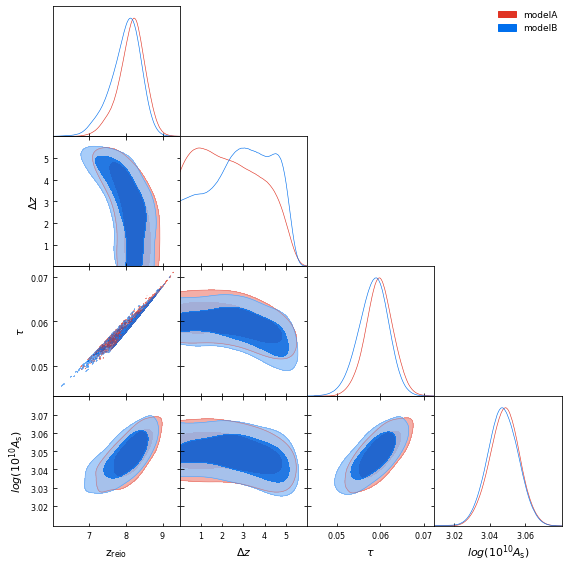

In [10]:
runnames = ["lb_zdz_A_b30_f65","lb_zdz_B_b30_f65"]
listpar = ['z_reio','reionization_width','tau','logA']
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
support = {'reionization_width':[0,6]}
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [11]:
for par in ['tau','z_reio','reionization_width']: MCtools.PrintMax( chains, par)

tau             =  0.059786 +/- 0.003093  |   0.058599 +/- 0.003400
z_reio          =  8.189820 +/- 0.348514  |   8.041799 +/- 0.405802
reionization_width =  2.321821 +/- 1.672448  |   2.970448 +/- 1.686566


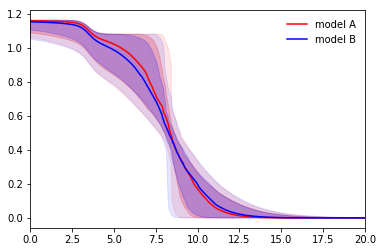

In [12]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], percentile( xe['xe'], 2.5, axis=0), percentile( xe['xe'], 97.5, axis=0), color=cols[ic], alpha=0.1)
    fill_between( xe['z'], percentile( xe['xe'], 16., axis=0), percentile( xe['xe'], 84.0, axis=0), color=cols[ic], alpha=0.2)
    plot( xe['z'], percentile( xe['xe'], 50, axis=0), color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

# Redshifts

### 2pars, 3knots
Setup (z2,z3): one fixed (z1=6,xe1=1) + one (z2,xe2=0.5) + one (z3,xe=0)

In [13]:
runnames = ["lb_3knots2z_A_b30_f65","lb_3knots2z_B_b30_f65"]
listpar = ['z2','z3','logA','tau']
support = {'z2':(6,20),'z3':(6,20)}

lb_3knots2z_A_b30_f65: 3399  3992  3361  3841 
lb_3knots2z_B_b30_f65: 2761  3241  3721  3721 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

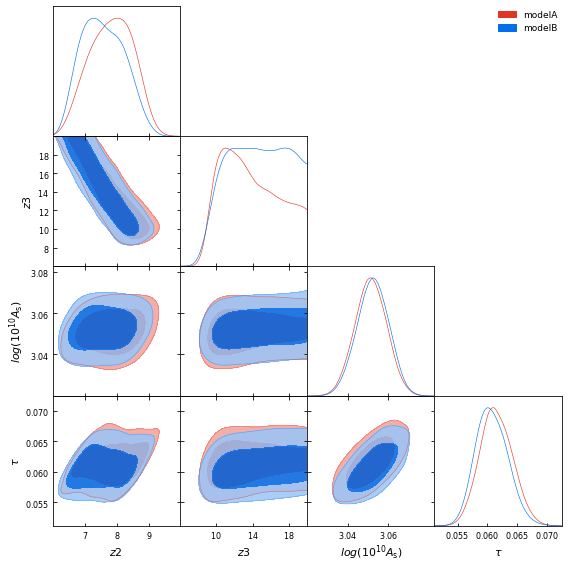

In [14]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [15]:
for par in ['tau','z2','z3']: MCtools.PrintMax( chains, par)

tau             =  0.061382 +/- 0.002726  |   0.060602 +/- 0.002686
z2              =  7.842389 +/- 0.716630  |   7.525736 +/- 0.712828
z3              =  13.308093 +/- 3.576200  |   14.545357 +/- 3.634171


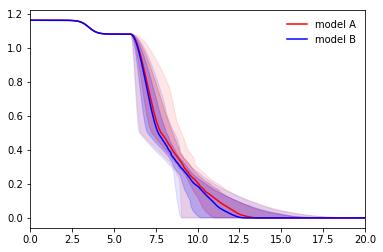

In [16]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], percentile( xe['xe'], 2.5, axis=0), percentile( xe['xe'], 97.5, axis=0), color=cols[ic], alpha=0.1)
    fill_between( xe['z'], percentile( xe['xe'], 16., axis=0), percentile( xe['xe'], 84.0, axis=0), color=cols[ic], alpha=0.2)
    plot( xe['z'], percentile( xe['xe'], 50, axis=0), color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

### 3pars, 3knots
Setup (z1,z2,z3): fit redshift for 3 knots with fixed xe= 1.0, 0.5, 0.0

In [17]:
runnames = ["lb_3knots3z_A_b30_f65","lb_3knots3z_B_b30_f65"]
listpar = ['z1','z2','z3','logA','tau']
support = {'z1':(6,20),'z2':(6,20),'z3':(6,20)}

lb_3knots3z_A_b30_f65: 2187  2541  1815  2148 
lb_3knots3z_B_b30_f65: 2488  2465  2365  2146 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

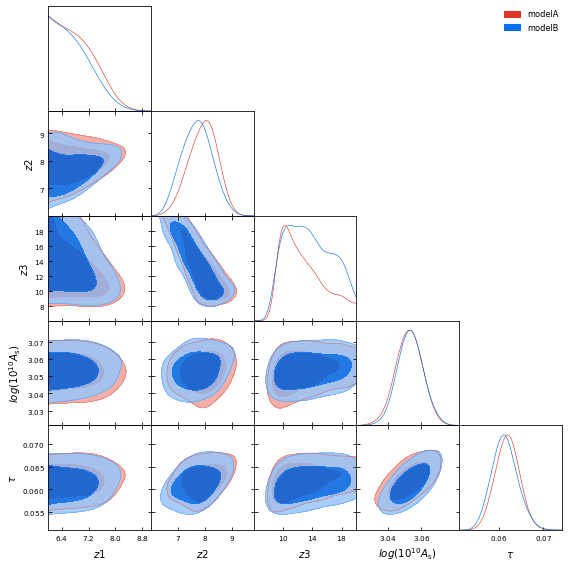

In [18]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [19]:
for par in ['tau','z1','z2','z3']: MCtools.PrintMax( chains, par)

tau             =  0.061888 +/- 0.002711  |   0.061212 +/- 0.002918
z1              =  6.811752 +/- 0.631450  |   6.719145 +/- 0.573562
z2              =  7.977029 +/- 0.545798  |   7.718375 +/- 0.581147
z3              =  12.134189 +/- 3.153639  |   13.324990 +/- 3.507767


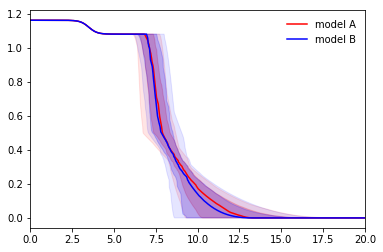

In [20]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], percentile( xe['xe'], 2.5, axis=0), percentile( xe['xe'], 97.5, axis=0), color=cols[ic], alpha=0.1)
    fill_between( xe['z'], percentile( xe['xe'], 16., axis=0), percentile( xe['xe'], 84.0, axis=0), color=cols[ic], alpha=0.2)
    plot( xe['z'], percentile( xe['xe'], 50, axis=0), color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

# Ionization fraction

### 4pars, 5knots
Setup (xe1,xe2,xe3,xe4): free xe for 4 knots with fixed redshifts at 7, 8, 9, 10 and one last knot (xe(20)=0)

In [21]:
runnames = ["lb_5knots_A_b30_f65","lb_5knots_B_b30_f65"]
listpar = ['xe1','xe2','xe3','xe4','logA','tau']
support = {p:(0,1) for p in listpar[:-2]}

lb_5knots_A_b30_f65: 7801  16401  12601  12401 
lb_5knots_B_b30_f65: 15001  11001  15201  7001 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

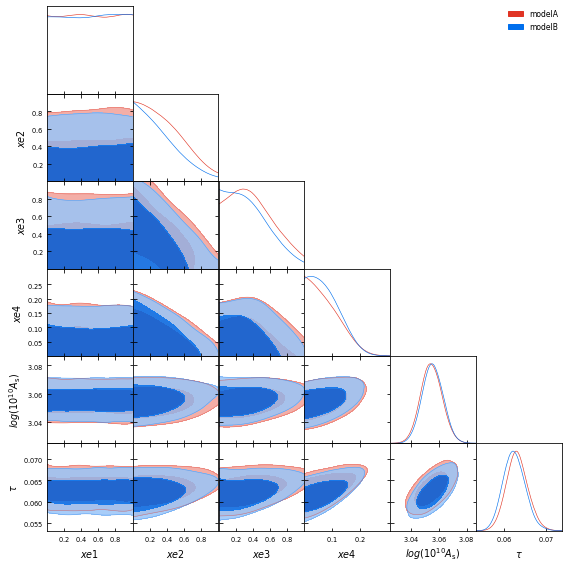

In [22]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [23]:
for par in ['tau','xe1','xe2','xe3','xe4']: MCtools.PrintMax( chains, par)

tau             =  0.063019 +/- 0.002537  |   0.062285 +/- 0.002625
xe1             =  0.496541 +/- 0.342134  |   0.509099 +/- 0.340941
xe2             =  0.325440 +/- 0.264007  |   0.267701 +/- 0.242957
xe3             =  0.367493 +/- 0.267409  |   0.321816 +/- 0.254070
xe4             =  0.068025 +/- 0.058297  |   0.071235 +/- 0.055967


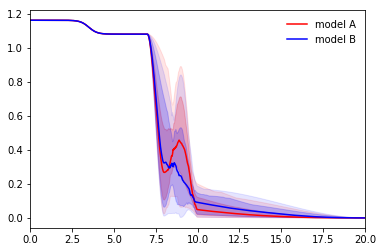

In [24]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], percentile( xe['xe'], 2.5, axis=0), percentile( xe['xe'], 97.5, axis=0), color=cols[ic], alpha=0.1)
    fill_between( xe['z'], percentile( xe['xe'], 16., axis=0), percentile( xe['xe'], 84.0, axis=0), color=cols[ic], alpha=0.2)
    plot( xe['z'], percentile( xe['xe'], 50, axis=0), color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

# Flexknots

### 2pars, 1knot
Setup (z2,xe2): one fixed knot (z1=6,xe1=1) + one free (z2,xe2) + one fixed (z3=20,xe3=0)

In [25]:
runnames = ["lb_1knot_A_b30_f65","lb_1knot_B_b30_f65"]
listpar = ['z2','xe2','logA','tau']
support = {'z2':(6,20),'xe2':(0,1)}

lb_1knot_A_b30_f65: 6961  5521  4321  4921 
lb_1knot_B_b30_f65: 3601  3601  2521  5761 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

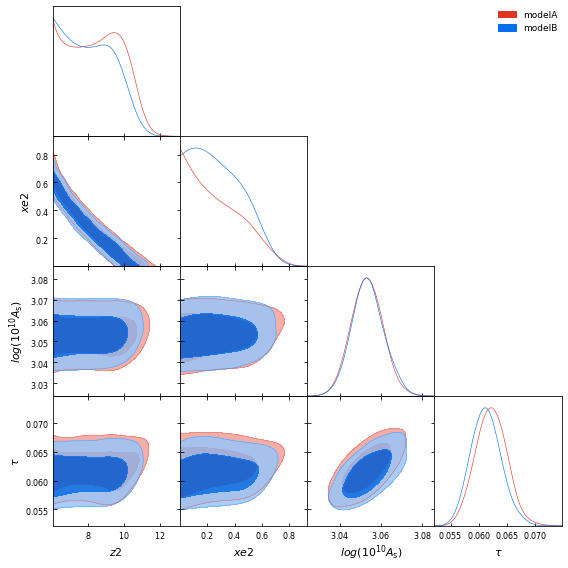

In [26]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [27]:
for par in ['tau','z2','xe2']: MCtools.PrintMax( chains, par)

tau             =  0.062244 +/- 0.002805  |   0.061266 +/- 0.002705
z2              =  8.469511 +/- 1.664620  |   8.091120 +/- 1.539275
xe2             =  0.241066 +/- 0.215972  |   0.269296 +/- 0.205282


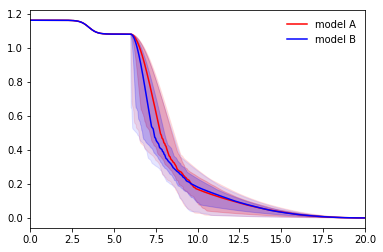

In [28]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], percentile( xe['xe'], 2.5, axis=0), percentile( xe['xe'], 97.5, axis=0), color=cols[ic], alpha=0.1)
    fill_between( xe['z'], percentile( xe['xe'], 16., axis=0), percentile( xe['xe'], 84.0, axis=0), color=cols[ic], alpha=0.2)
    plot( xe['z'], percentile( xe['xe'], 50, axis=0), color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

### 4pars, 2knots
Setup (z2, xe2, z3, xe3) : two free knots + two fixed nodes at beginning (xe(6)=1) and end (xe(20)=0)

In [29]:
runnames = ["lb_4knots_A_b30_f65","lb_4knots_B_b30_f65"]
listpar = ['z2','z3','xe2','xe3','logA','tau']
support = {'z2':(6,15),'z3':(6,20),'xe2':(0,1),'xe3':(0,1)}

lb_4knots_A_b30_f65: 5417  5278  5710  5707 
lb_4knots_B_b30_f65: 5628  6278  6354  5480 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

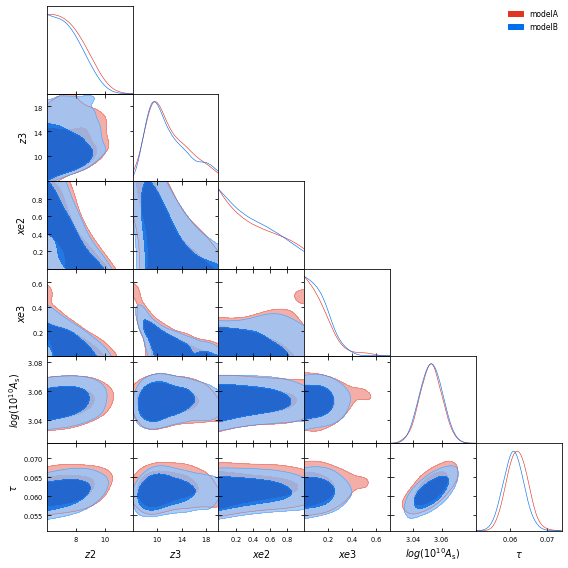

In [30]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [31]:
for par in ['tau','z2','z3','xe2','xe3']: MCtools.PrintMax( chains, par)

tau             =  0.061995 +/- 0.002832  |   0.060957 +/- 0.002770
z2              =  7.552206 +/- 1.220133  |   7.427614 +/- 1.116193
z3              =  11.041562 +/- 3.320909  |   10.929604 +/- 3.337954
xe2             =  0.361069 +/- 0.324840  |   0.356937 +/- 0.305238
xe3             =  0.113278 +/- 0.101414  |   0.119324 +/- 0.095112


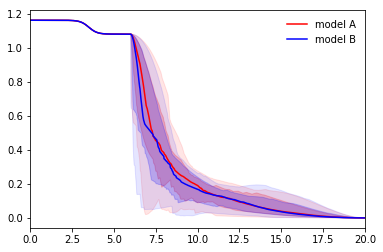

In [32]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], percentile( xe['xe'], 2.5, axis=0), percentile( xe['xe'], 97.5, axis=0), color=cols[ic], alpha=0.1)
    fill_between( xe['z'], percentile( xe['xe'], 16., axis=0), percentile( xe['xe'], 84.0, axis=0), color=cols[ic], alpha=0.2)
    plot( xe['z'], percentile( xe['xe'], 50, axis=0), color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()

### 4pars, 3knots
Setup (z1,z2,xe2,z3): fit redshift for the first (z1,xe1=1) + one free knot (z2,xe2) + one last (z3,xe3=0)

In [33]:
runnames = ["lb_3knots_A_b30_f65","lb_3knots_B_b30_f65"]
listpar = ['z1','z2','z3','xe2','logA','tau']
support = {'z1':(6,20),'z2':(6,20),'z3':(6,20),'xe2':(0,1)}

lb_3knots_A_b30_f65: 2444  2812  2419  2365 
lb_3knots_B_b30_f65: 2443  2504  2395  2900 
Removed no burn in
Removed no burn in


<Figure size 576x576 with 0 Axes>

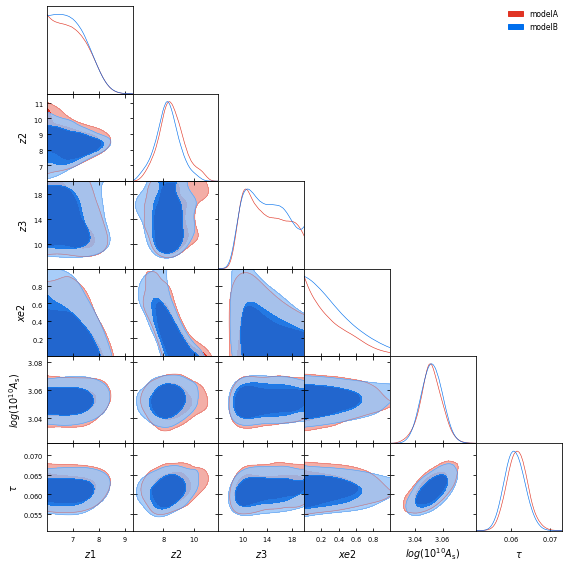

In [34]:
chains = [MCtools.mergeMC( "%s/%s/mcmc" % (DBdir,run), burnin=0.6) for run in runnames]
labels = [MCtools.parname.get(p,p).replace('$','') for p in listpar]
samples = [MCSamples( samples=[ chain[p] for p in listpar], names=listpar, labels=labels, ranges=support) for chain in chains]

g = plots.getSinglePlotter(width_inch=8, ratio=1)
g.triangle_plot(samples, listpar, filled = True,
                legend_labels = ["modelA", "modelB"],legend_loc = 'upper right')

In [35]:
for par in ['tau','z1','z2','z3','xe2']: MCtools.PrintMax( chains, par)

tau             =  0.061519 +/- 0.002619  |   0.060775 +/- 0.002638
z1              =  6.908611 +/- 0.698999  |   6.925991 +/- 0.664824
z2              =  8.474321 +/- 0.806857  |   8.266349 +/- 0.765117
z3              =  13.205750 +/- 3.845120  |   13.441210 +/- 3.597541
xe2             =  0.243196 +/- 0.255128  |   0.288778 +/- 0.267539


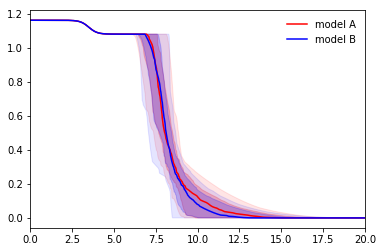

In [36]:
figure()
cols = ['r','b']
for ic,run in enumerate(runnames):
    xe = np.load( f"{DBdir}/xe_{run}.npy", allow_pickle=True).item()
    fill_between( xe['z'], percentile( xe['xe'], 2.5, axis=0), percentile( xe['xe'], 97.5, axis=0), color=cols[ic], alpha=0.1)
    fill_between( xe['z'], percentile( xe['xe'], 16., axis=0), percentile( xe['xe'], 84.0, axis=0), color=cols[ic], alpha=0.2)
    plot( xe['z'], percentile( xe['xe'], 50, axis=0), color=cols[ic], label='model A' if ic == 0 else 'model B')
xlim(0,20)
legend()